In [0]:
import numpy as np
import pandas as pd
import re
import cv2
import matplotlib.pyplot as plt
import random
import math
import gc
from datetime import datetime

## Connecting to Google Drive. You can download dataset using tensorflow(https://www.tensorflow.org/datasets/catalog/oxford_iiit_pet). But we downloaded the dataset to google drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs            13G     0   13G   0% /sys/fs/cgroup
shm              13G     0   13G   0% /dev/shm
/dev/sda1        75G   33G   43G  44% /opt/bin
tmpfs            13G   16K   13G   1% /var/colab
tmpfs            13G     0   13G   0% /proc/acpi
tmpfs            13G     0   13G   0% /proc/scsi
tmpfs            13G     0   13G   0% /sys/firmware
drive            15G  9.7G  5.4G  65% /content/drive


## Loading zipped dataset from google drive to local machine

In [0]:
!cp /content/drive/'My Drive'/ml_final/dataset.zip .

In [0]:
!ls

dataset.zip  drive  sample_data


## Unzipping dataset

In [0]:
!unzip dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/images/Sphynx_90.jpg  
  inflating: dataset/images/images/Sphynx_91.jpg  
  inflating: dataset/images/images/Sphynx_92.jpg  
  inflating: dataset/images/images/Sphynx_93.jpg  
  inflating: dataset/images/images/Sphynx_94.jpg  
  inflating: dataset/images/images/Sphynx_95.jpg  
  inflating: dataset/images/images/Sphynx_96.jpg  
  inflating: dataset/images/images/Sphynx_98.jpg  
  inflating: dataset/images/images/Sphynx_99.jpg  
  inflating: dataset/images/images/american_bulldog_10.jpg  
  inflating: dataset/images/images/american_bulldog_100.jpg  
  inflating: dataset/images/images/american_bulldog_101.jpg  
  inflating: dataset/images/images/american_bulldog_102.jpg  
  inflating: dataset/images/images/american_bulldog_103.jpg  
  inflating: dataset/images/images/american_bulldog_104.jpg  
  inflating: dataset/images/images/american_bulldog_105.jpg  
  inflating: dataset/images/images/american_bulldog_106.j

In [0]:
# !ls

dataset  dataset.zip  drive  sample_data


## Readind data

In [0]:
import glob

paths = []
for image in glob.iglob('dataset/images/images' + '/*.jpg'):
    print(image)
    paths.append(image)
    # img = cv2.imread(image)
    # mask_path = 'dataset/annotations/annotations/trimaps/'+image[22:-4]+'.png'
    # mask = cv2.imread(mask_path)
    # plt.matshow(img)
    # plt.matshow(mask)
    # break

Streaming output truncated to the last 5000 lines.
dataset/images/images/american_bulldog_41.jpg
dataset/images/images/Persian_11.jpg
dataset/images/images/american_pit_bull_terrier_48.jpg
dataset/images/images/american_pit_bull_terrier_4.jpg
dataset/images/images/Egyptian_Mau_41.jpg
dataset/images/images/Birman_24.jpg
dataset/images/images/Egyptian_Mau_26.jpg
dataset/images/images/keeshond_75.jpg
dataset/images/images/staffordshire_bull_terrier_87.jpg
dataset/images/images/Bombay_102.jpg
dataset/images/images/Birman_109.jpg
dataset/images/images/english_cocker_spaniel_167.jpg
dataset/images/images/Birman_144.jpg
dataset/images/images/wheaten_terrier_134.jpg
dataset/images/images/Abyssinian_5.jpg
dataset/images/images/pomeranian_194.jpg
dataset/images/images/Ragdoll_119.jpg
dataset/images/images/yorkshire_terrier_176.jpg
dataset/images/images/basset_hound_57.jpg
dataset/images/images/chihuahua_7.jpg
dataset/images/images/japanese_chin_57.jpg
dataset/images/images/keeshond_106.jpg
datas

In [0]:
n = len(paths)
n

7390

In [0]:
# There are some "glitched" images in the dataset, they return None when
# they are read using cv2.imread(). We must find them and delete them from
# the paths[] list, in order to avoid getting errors.
glitched_images = []
paths_no_glitched = []

for i in range(len(paths)):
    print(i)
    img_path = paths[i]
    mask_path = 'dataset/annotations/annotations/trimaps/'+img_path[22:-4]+'.png'
    # print(img_path)
    # print(mask_path)
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    if img is None or mask is None:
      glitched_images.append(img_path)
    else:
      paths_no_glitched.append(img_path)
    


del paths
paths = paths_no_glitched
del paths_no_glitched

Streaming output truncated to the last 5000 lines.
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580

In [0]:
n = len(paths)
n

7384

In [0]:
# img = cv2.imread('dataset/images/images/Egyptian_Mau_139.jpg')

In [0]:
# img is None

In [0]:
glitched_images

['dataset/images/images/Abyssinian_34.jpg',
 'dataset/images/images/Egyptian_Mau_139.jpg',
 'dataset/images/images/Egyptian_Mau_191.jpg',
 'dataset/images/images/Egyptian_Mau_167.jpg',
 'dataset/images/images/Egyptian_Mau_177.jpg',
 'dataset/images/images/Egyptian_Mau_145.jpg']

## Image augmentation

In [0]:
import albumentations as A

In [0]:
def get_augmentations(image_size):
    return A.Compose([
        A.OneOf([
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1,
                               rotate_limit=45,
                               border_mode=cv2.BORDER_CONSTANT),
            A.ElasticTransform(alpha_affine=0,
                               alpha=35,
                               sigma=5,
                               border_mode=cv2.BORDER_CONSTANT),
            A.OpticalDistortion(distort_limit=0.11, shift_limit=0.15,
                                border_mode=cv2.BORDER_CONSTANT),
            A.GridDistortion(border_mode=cv2.BORDER_CONSTANT),
            A.NoOp()
        ]),

        A.OneOf([

            A.RandomCrop(height=int(image_size[0]*(0.5 + random.random()*0.5)),
                        width=int(image_size[1]*(0.5 + random.random()*0.5)), p=0.3),
            A.NoOp()
        ]),

        # Brightness/contrast augmentations
        A.OneOf([
            A.RandomBrightnessContrast(brightness_limit=0.5,
                                       contrast_limit=0.4),
            A.RandomGamma(gamma_limit=(50, 150)),
            A.NoOp()
        ]),

        A.OneOf([
            A.RGBShift(r_shift_limit=10, b_shift_limit=10, g_shift_limit=10),
            A.HueSaturationValue(hue_shift_limit=10,
                                 sat_shift_limit=10),
            A.NoOp()
        ])
    ])

## Dividing the dataset

In [0]:
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

idx1 = int(train_ratio * n)
idx2 = int((train_ratio+val_ratio) * n)

# we want the dataset to be shuffled, but we need to set the seed
# to avoid having different datasets everytime we run the code

random.seed(59) # don't change the seed
randomlist = list(range(0,n))
random.shuffle(randomlist)
random.seed(datetime.now())

train_data = randomlist[:idx1]
val_data = randomlist[idx1:idx2]
test_data = randomlist[idx2:]

# NOTE: train_data, val_data and test_data don't actually contain images
# and trimaps, as the names of the variables might suggest.
# They only contain indexes of train, validation, test datasets.
# The actual data will be generated from those indexes in data generators
# (the following piece of code)

## Data generators (data loaders)( for using mini batches)

In [0]:
def train_generator(batch_size):

    start_idx = 0
    end_idx = batch_size
    length = len(train_data)

    while True:
        X = []
        y = []
        train_batch = train_data[start_idx:end_idx]
        # update indexes
        if end_idx == length:
          start_idx = 0
          end_idx = batch_size
        else:
          start_idx = end_idx
          end_idx = end_idx + batch_size
          if end_idx > length:
            end_idx = length
          
        for i in range(len(train_batch)):
            num = train_batch[i]
            img_path = paths[num]

            mask_path = 'dataset/annotations/annotations/trimaps/'+img_path[22:-4]+'.png'
            # img_path[22:-4] returns the image's name for me, if the path to your dataset
            # is different you might need to change the first index (22) to something else.
            # (the index of the image path at which the image name starts)
            img = cv2.imread(img_path)
            mask = cv2.imread(mask_path)

            # augmentation
            data = {'image': img.astype('uint8'), 'mask': mask}
            augmented = get_augmentations(img.shape)(**data)
            img, mask = augmented["image"], augmented["mask"]
            
            mask = mask[:,:,0] == 2
            mask = mask.astype(np.uint8)
            mask = 1 - mask

            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))

            X.append(img)
            y.append(mask.reshape(256 , 256 , 1))

            del img_path
            del mask_path
            del data
            del img
            del mask
        X = np.array(X)/255
        y = np.array(y)
        yield (X , y)

In [0]:
def val_generator(batch_size):

  start_idx = 0
  end_idx = batch_size
  length = len(val_data)

  while True:
    X = []
    y = []

    val_batch = val_data[start_idx:end_idx]
    # update indexes
    if end_idx == length:
      start_idx = 0
      end_idx = batch_size
    else:
      start_idx = end_idx
      end_idx = end_idx + batch_size
      if end_idx > length:
        end_idx = length

    for i in range(len(val_batch)):
      num = val_batch[i]
      img_path = paths[num]

      mask_path = 'dataset/annotations/annotations/trimaps/'+img_path[22:-4]+'.png'
      # img_path[22:-4] returns the image's name for me, if the path to your dataset
      # is different you might need to change the first index (22) to something else.
      # (the index of the image path at which the image name starts)
      img = cv2.imread(img_path)
      mask = cv2.imread(mask_path)

      mask = mask[:,:,0] == 2
      mask = mask.astype(np.uint8)
      mask = 1 - mask

      img = cv2.resize(img, (256, 256))
      mask = cv2.resize(mask, (256, 256))

      X.append(img)
      y.append(mask.reshape(256 , 256 , 1))

      del img_path
      del mask_path
      del img
      del mask
    X = np.array(X)/255
    y = np.array(y)
    yield (X , y)

In [0]:
def test_generator(batch_size, evaluate=False):

  start_idx = 0
  end_idx = batch_size
  length = len(test_data)

  while True:
    X = []
    y = []

    test_batch = test_data[start_idx:end_idx]
    # update indexes
    if end_idx == length:
      start_idx = 0
      end_idx = batch_size
    else:
      start_idx = end_idx
      end_idx = end_idx + batch_size
      if end_idx > length:
        end_idx = length

    for i in range(len(test_batch)):
      num = test_batch[i]
      img_path = paths[num]

      mask_path = 'dataset/annotations/annotations/trimaps/'+img_path[22:-4]+'.png'
      # img_path[22:-4] returns the image's name for me, if the path to your dataset
      # is different you might need to change the first index (22) to something else
      # (the index of the image path at which the image name starts)
      img = cv2.imread(img_path)
      mask = cv2.imread(mask_path)

      mask = mask[:,:,0] == 2
      mask = mask.astype(np.uint8)
      mask = 1 - mask

      img = cv2.resize(img, (256, 256))
      mask = cv2.resize(mask, (256, 256))

      X.append(img)
      y.append(mask.reshape(256 , 256 , 1))

      del img_path
      del mask_path
      del img
      del mask
    X = np.array(X)/255
    y = np.array(y)
    if evaluate:
      yield (X , y)
    else:
      yield X

In [0]:
X_test = []
y_test = []

for i in test_data:
  img_path = paths[i]
  mask_path = 'dataset/annotations/annotations/trimaps/'+img_path[22:-4]+'.png'
  # img_path[22:-4] returns the image's name for me, if the path to your dataset
  # is different you might need to change the first index (22) to something else.
  img = cv2.imread(img_path)
  mask = cv2.imread(mask_path)

  mask = mask[:,:,0] == 2
  mask = mask.astype(np.uint8)
  mask = 1 - mask

  img = cv2.resize(img, (256, 256))
  mask = cv2.resize(mask, (256, 256))

  X_test.append(img)
  y_test.append(mask.reshape(256 , 256 , 1))


X_test = np.array(X_test)/255
y_test = np.array(y_test)

dataset/images/images/pug_115.jpg


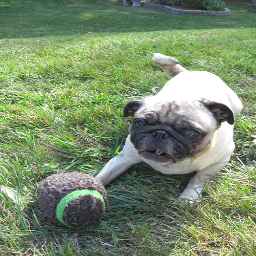

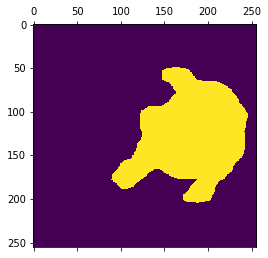

In [0]:
num = random.randint(0, len(paths))
img_path = paths[num]
print(img_path)

mask_path = 'dataset/annotations/annotations/trimaps/'+img_path[22:-4]+'.png'
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

# augmentation
data = {'image': img.astype('uint8'), 'mask': mask}
augmented = get_augmentations(img.shape)(**data)
img, mask = augmented["image"], augmented["mask"]

mask = mask[:,:,0] == 2
mask = mask.astype(np.uint8)
mask = 1 - mask

img = cv2.resize(img, (256, 256))
mask = cv2.resize(mask, (256, 256))



from google.colab.patches import cv2_imshow
cv2_imshow(img)
print()
# cv2_imshow(mask)
print()
plt.matshow(mask)

## Network architecture (UNet)

In [0]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
inputs = tf.keras.Input((256 , 256 , 3))
conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = tf.keras.layers.Dropout(0.5)(conv4)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = tf.keras.layers.Dropout(0.5)(conv5)

up6 = tf.keras.layers.Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(drop5))
merge6 = tf.keras.layers.concatenate([drop4,up6], axis = 3)
conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = tf.keras.layers.Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv6))
merge7 = tf.keras.layers.concatenate([conv3,up7], axis = 3)
conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = tf.keras.layers.Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv7))
merge8 = tf.keras.layers.concatenate([conv2,up8], axis = 3)
conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = tf.keras.layers.Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(tf.keras.layers.UpSampling2D(size = (2,2))(conv8))
merge9 = tf.keras.layers.concatenate([conv1,up9], axis = 3)
conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = tf.keras.layers.Conv2D(1, 3, activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv9)
model = tf.keras.Model(inputs = inputs, outputs = conv9)

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])



In [0]:
conv9

<tf.Tensor 'conv2d_22/Identity:0' shape=(None, 256, 256, 1) dtype=float32>

## Training

In [0]:
batch_size = 16
steps_per_epoch = math.ceil(n * train_ratio / batch_size)
validation_steps = math.ceil(n * val_ratio / batch_size)
model.fit_generator(train_generator(batch_size),
              steps_per_epoch=steps_per_epoch,
              epochs=5,
              verbose=1,
              validation_data=val_generator(batch_size),
              validation_steps=validation_steps,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
324/324 [==============================] - 176s 543ms/step - loss: 0.5265 - accuracy: 0.7437 - val_loss: 0.4809 - val_accuracy: 0.7829
Epoch 2/5
324/324 [==============================] - 175s 540ms/step - loss: 0.3995 - accuracy: 0.8231 - val_loss: 0.3157 - val_accuracy: 0.8636
Epoch 3/5
324/324 [==============================] - 175s 541ms/step - loss: 0.3430 - accuracy: 0.8523 - val_loss: 0.3065 - val_accuracy: 0.8655
Epoch 4/5
324/324 [==============================] - 175s 540ms/step - loss: 0.3100 - accuracy: 0.8677 - val_loss: 0.2707 - val_accuracy: 0.8829
Epoch 5/5
324/324 [==============================] - 175s 540ms/step - loss: 0.2859 - accuracy: 0.8789 - val_loss: 0.2687 - val_accuracy: 0.8815


In [0]:
batch_size = 16
steps_per_epoch = math.ceil(n * train_ratio / batch_size)
validation_steps = math.ceil(n * val_ratio / batch_size)
model.fit_generator(train_generator(batch_size),
              steps_per_epoch=steps_per_epoch,
              epochs=10,
              verbose=1,
              validation_data=val_generator(batch_size),
              validation_steps=validation_steps,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=5)

Epoch 6/10
324/324 [==============================] - 175s 539ms/step - loss: 0.2713 - accuracy: 0.8865 - val_loss: 0.2375 - val_accuracy: 0.9052
Epoch 7/10
324/324 [==============================] - 176s 545ms/step - loss: 0.2547 - accuracy: 0.8943 - val_loss: 0.2387 - val_accuracy: 0.9061
Epoch 8/10
324/324 [==============================] - 175s 541ms/step - loss: 0.2496 - accuracy: 0.8963 - val_loss: 0.2257 - val_accuracy: 0.9095
Epoch 9/10
324/324 [==============================] - 176s 542ms/step - loss: 0.2397 - accuracy: 0.9014 - val_loss: 0.2057 - val_accuracy: 0.9137
Epoch 10/10
324/324 [==============================] - 175s 541ms/step - loss: 0.2238 - accuracy: 0.9085 - val_loss: 0.2012 - val_accuracy: 0.9164


In [0]:
batch_size = 16
steps_per_epoch = math.ceil(n * train_ratio / batch_size)
validation_steps = math.ceil(n * val_ratio / batch_size)
model.fit_generator(train_generator(batch_size),
              steps_per_epoch=steps_per_epoch,
              epochs=15,
              verbose=1,
              validation_data=val_generator(batch_size),
              validation_steps=validation_steps,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=10)

Epoch 11/15
324/324 [==============================] - 175s 540ms/step - loss: 0.2184 - accuracy: 0.9110 - val_loss: 0.2036 - val_accuracy: 0.9146
Epoch 12/15
324/324 [==============================] - 176s 543ms/step - loss: 0.2057 - accuracy: 0.9164 - val_loss: 0.1957 - val_accuracy: 0.9192
Epoch 13/15
324/324 [==============================] - 175s 540ms/step - loss: 0.1995 - accuracy: 0.9190 - val_loss: 0.1921 - val_accuracy: 0.9212
Epoch 14/15
324/324 [==============================] - 175s 540ms/step - loss: 0.1932 - accuracy: 0.9219 - val_loss: 0.1892 - val_accuracy: 0.9219
Epoch 15/15
324/324 [==============================] - 177s 546ms/step - loss: 0.1892 - accuracy: 0.9242 - val_loss: 0.1986 - val_accuracy: 0.9167


## During epochs 11-15, val_accuracy is somewhat fluctuating, so we'll stop the training there

In [0]:
# Save the model
model.save("/content/drive/My Drive/ml_final/model3.h5")

In [0]:
# Load the model
model = tf.keras.models.load_model("/content/drive/My Drive/ml_final/model.h5")

# we've been saving the model every 5 epochs
# so in order to load the model with 5 epochs trained, load model.h5
# to load the model with 10 epochs, load model2.h5
# to load the model with 15 epochs, load model3.h5

## Prediction

In [0]:
batch_size = 16
steps = math.ceil(n * test_ratio / batch_size)
test_accuracy = model.evaluate_generator(test_generator(batch_size, evaluate=True), verbose=1, steps=steps)

70/70 [==============================] - 12s 173ms/step - loss: 0.2186 - accuracy: 0.9133


In [0]:
pred = model.predict_generator(test_generator(batch_size, evaluate=False), verbose=1, steps=steps)

70/70 [==============================] - 12s 169ms/step


In [0]:
def get_iou(target , pred):
  sz = target.shape[0]
  # print(sz)
  inter = (target.astype(np.bool)*pred.astype(np.bool))
  union = (target.astype(np.bool)+pred.astype(np.bool))
  # print(inter.sum(axis = (1 , 2)))
  # print(union.sum(axis = (1 , 2)))
  return (inter.sum(axis = (1, 2))/union.sum(axis = (1, 2))).sum()/sz

In [0]:
pred[pred>0.5] = 1
pred[pred<=0.5] = 0

## Result on test set

In [0]:
get_iou(y_test, pred=pred)

0.8168909927500787

## Visualization of the result

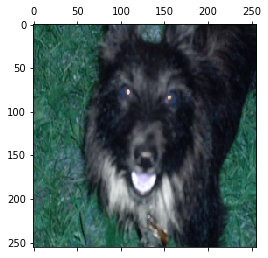

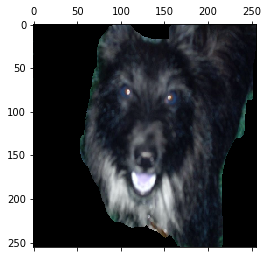

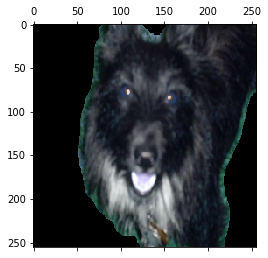

In [0]:
num = 10
plt.matshow(X_test[num].reshape(256 , 256 , 3))
# Target
plt.matshow(X_test[num]*np.repeat(y_test[num].reshape(256 , 256)[:, :, np.newaxis], 3, axis=2).reshape(256 , 256 , 3))
# Prediction
plt.matshow(X_test[num]*np.repeat(pred[num].reshape(256 , 256)[:, :, np.newaxis], 3, axis=2).reshape(256 , 256 , 3))